# Что мы узнаем сегодня?

<img src="https://i.imgflip.com/2jvg4j.jpg" width=300 align="center">

1. [Как работать с пропусками в данных](#Пропуски-в-данных)
2. [Как работать с категориальными признаками](#Категориальные-признаки)
3. [Полезные преобразования данных](#Полезные-преобразования-данных)
4. [Инжинирим признаки](#Инжинирим-признаки)
5. [Поговорим про отбор признаков](#Отбор-признаков)
6. [KaggleInClass](#KaggleInClass)

# Пропуски в данных

Рассмотрим датасет `communities and crime`. Этот датасет содержит различные признаки, которые характеризуют район. Задача предсказать уровень преступности на 100 тысяч человек. Это задача регрессии.

In [1]:
import numpy as np
import pandas as pd

# Датасет взят отсюда: http://archive.ics.uci.edu/ml/datasets/communities+and+crime
# Загружаем датасет

x = pd.read_csv('https://raw.githubusercontent.com/ischurov/math-ml-hse-2018/master/sem05_lin_reg/communities.csv')

In [2]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(123)
memory usage: 1.9 MB


Итак, у нас 1994 района и 122 признака, `ViolentCrimesPerPop` наша таргетная переменная.

Давайте взглянем на данные:

In [3]:
# Посмотрим на данные:
x.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


Видим глазами много пропусков. А как узнать сколько значений не известно?

In [4]:
x.isna().any().sum() # сколько признаков содержат неизвестные значения

23

In [5]:
list(x.isna().sum()) #cколько неизвестных значений содержит каждый признак

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 1675,
 0,
 0,
 0,
 1675,
 1675,
 1675,
 1675,
 0,
 1675,
 0]

In [6]:
# Выведите одно число -- количество пропущенных значений
x.isna().sum().sum()

36851

In [7]:
x = x.dropna(axis=1, thresh=1000)
x

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
5,0.02,0.28,0.06,0.54,1.00,0.25,0.31,0.48,0.27,0.37,...,0.70,0.42,0.49,0.73,0.64,0.01,0.58,0.10,0.00,0.14
6,0.01,0.39,0.00,0.98,0.06,0.02,0.30,0.37,0.23,0.60,...,0.15,0.81,0.77,0.91,0.84,0.05,0.08,0.06,0.00,0.03
7,0.01,0.74,0.03,0.46,0.20,1.00,0.52,0.55,0.36,0.35,...,0.59,0.58,0.52,0.79,0.78,0.01,0.33,0.00,0.00,0.55
8,0.03,0.34,0.20,0.84,0.02,0.00,0.38,0.45,0.28,0.48,...,0.01,0.78,0.48,0.79,0.75,0.04,0.17,0.04,0.00,0.53
9,0.01,0.40,0.06,0.87,0.30,0.03,0.90,0.82,0.80,0.39,...,0.22,0.42,0.34,0.23,0.09,0.00,0.47,0.11,0.00,0.15


**Как быть?**

<img src="https://cdn-images-1.medium.com/max/1040/1*_RA3mCS30Pr0vUxbp25Yxw.png" width=600>

**Удалить лишнее**
* Выкинуть данные с неизвестным признаком
* Выкинуть признак, если он имеет слишком мало известных значений

**Восстановить значения**

*В англоязычной терминологии это называется `imputation`.*
    
   * Для **вещественных** признаков
    * Заполнить все пропуски средним (модой, медианой) значениями признака
    * Предсказывать значение пропущенного признака с помощью линейной регрессии
   * Для **категориальных**
    * Отдельное значением типа "n/a"
    * Использовать самое частое значение признака


Хорошая идея также добавить отдельный признак `A_missing` и присваивать ему значение `1` всякий раз, когда значение признака `A` пропущено.

Более подробно можно почитать [здесь](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4).

In [8]:
# Заполняем все пропуски в данных средними значениями для каждого признака
from sklearn import preprocessing

mis_replacer = preprocessing.Imputer(strategy="mean")
x = pd.DataFrame(data=mis_replacer.fit_transform(x), columns=x.columns)

In [9]:
# Aльтернатива через pandas
# Подробнее в описании функции
x.fillna(value=0, inplace=True)

In [10]:
# Теперь можно проверить снова сколько у нас пропущенных данных
# Выведите одно число -- количество пропущенных значений
x.isna().any().sum().sum()

0

---

# Категориальные признаки

Для примера создадим небольшую табличку

In [11]:
import pandas as pd

# просто табличка для примера
def create_data():
    return (pd.DataFrame({'city': ['Moscow', 'London', 'London', 'Kiev',
                                   'Moscow', 'Moscow', 'Kiev','Moscow'],
                          'degree': [1,1,2,2,3,3,1,1],
                          'class':['A','B','A','A','B','B','A','A'],
                          'income':[10.2, 11.6, 8.8, 9.0, 6.6, 10.0, 9.0, 7.2]}))

data = create_data()
data

,city,class,degree,income
0,Moscow,A,1,10.2
1,London,B,1,11.6
2,London,A,2,8.8
3,Kiev,A,2,9.0
4,Moscow,B,3,6.6
5,Moscow,B,3,10.0
6,Kiev,A,1,9.0
7,Moscow,A,1,7.2


###  Как понять, что признак категориальный?

Идея - категориальные признаки те, в которых значения - строки или число уникальных значений достаточно мало.

In [12]:
# найти все признаки, в которых первое значение - строка
def find_cat(data, num_uniq=4):
    for name in data.columns:
        s = ''
        s += name
        if (type(data[name][0]) == str):
            s += ' строка,'
        if (data[name].nunique()<=num_uniq):
            s += ' мало уникальных'
        if (s!=name):
            print (s)
            
find_cat(data)

city строка, мало уникальных
class строка, мало уникальных
degree мало уникальных


### Как подавать категориальные признаки алгоритму?

Алгоритмы хотят, чтобы им на вход подавали числа, а не строки. Кроме того, большая часть алгоритмов машинного обучения тем или иным образом использует понятие расстояния между точками. Поэтому приходится подумать как же так представить категориальный признак, чтобы все заработало.

Существует как минимум *2 популярных подхода*:

1) Самый простой подход **one-hot кодирование**.
Выглядит это так

<img src="https://i.imgur.com/mtimFxh.png", width=500>

Этот способ наиболее универсален и применяется по умолчанию. Универсальность здесь означает -- возможность использования такого представления в любом алгоритме машинного обучения.

Теперь посмотрите на картинку. Если еще не стало понятно, то вот пояснение.

Суть в том, что каждое значение категориального признака порождает свой собственный признак. Далее, кодируем нулями и единицами отсутствие или наличие соответствующего признака.


In [13]:
# Очень просто с помощью pandas
# Заметим при этом, что `degree` и `income` остались неизменными.
pd.get_dummies(data)

,degree,income,city_Kiev,city_London,city_Moscow,class_A,class_B
0,1,10.2,0,0,1,1,0
1,1,11.6,0,1,0,0,1
2,2,8.8,0,1,0,1,0
3,2,9.0,1,0,0,1,0
4,3,6.6,0,0,1,0,1
5,3,10.0,0,0,1,0,1
6,1,9.0,1,0,0,1,0
7,1,7.2,0,0,1,1,0


Если хочется больше гибкости, можно попробовать для тех же целей воспользоваться `OneHotEncoder` из `sklearn.preprocessing`

2) **Группируем числовые признаки по категориальным**

Например, для каждого значения признака `city` из нашей таблички можно посчитать среднее значение `income`.

In [14]:
# функция возвращает значения нового признака
def code_mean(data, cat_feature, real_feature):
    return (data[cat_feature].map(data.groupby(cat_feature)[real_feature].mean()))

data = create_data()
data['city_mean_income'] = code_mean(data, 'city', 'income')
data[:6]

,city,class,degree,income,city_mean_income
0,Moscow,A,1,10.2,8.5
1,London,B,1,11.6,10.2
2,London,A,2,8.8,10.2
3,Kiev,A,2,9.0,9.0
4,Moscow,B,3,6.6,8.5
5,Moscow,B,3,10.0,8.5


### Дата и время

* **Перевод в категориальные признаки**

``` python
df['dow'] = df['created'].apply(lambda x: x.date().weekday())
df['is_weekend'] = df['created'].apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)
```
Можно разбивать на рабочие дни и выходные, на конкретное время дня.

* **Проекция на окружность и использованием 2х координат**

In [15]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)

make_harmonic_features(12)

(-1.0, 1.2246467991473532e-16)

### Геоданные


<img src="http://i651.photobucket.com/albums/uu231/soopernova/latitudylongitud.gif", width=500>

In [16]:
!pip install reverse_geocoder

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import reverse_geocoder as revgc
revgc.search((40.74482, -73.94875))

Loading formatted geocoded file...


[{'admin1': 'New York',
  'admin2': 'Queens County',
  'cc': 'US',
  'lat': '40.74482',
  'lon': '-73.94875',
  'name': 'Long Island City'}]

---

# Полезные преобразования данных

Иногда числовые значения признаков хорошо бы привести к другим значениям с помощью преобразований. Очень часто это может улучшить результаты некоторых алгоритмов. Такие алгоритмы, как правило, делают некоторые предположения о характере данных или же опираются на расстояния между элементами выборки.


**Популярные преобразования**

(1) **Z-score**
$$\large z(x) = \frac{x - \mu}{\sigma}$$

* Полезно, если существенно расстояние между точками (например в knn)
* Это преобразование линейное, оно не меняет распределение данных

In [18]:
# Есть в sklearn
from sklearn.preprocessing import StandardScaler

In [19]:
# Обратим внимание на значение 100
data = np.array([1, 1, 0, -1, 2, 3, -2, 4, 100], dtype=np.float32).reshape(-1,1)
StandardScaler().fit_transform(data)

array([[-0.3529866 ],
       [-0.3529866 ],
       [-0.3850763 ],
       [-0.417166  ],
       [-0.32089692],
       [-0.28880724],
       [-0.44925568],
       [-0.25671753],
       [ 2.8238928 ]], dtype=float32)

In [20]:
# Это то же самое, что сделать это руками:
(data - data.mean()) / data.std()

array([[-0.3529866 ],
       [-0.3529866 ],
       [-0.3850763 ],
       [-0.417166  ],
       [-0.32089692],
       [-0.28880724],
       [-0.44925568],
       [-0.25671753],
       [ 2.8238928 ]], dtype=float32)

   ---
   (2) **MinMax Scaling**
    
Другой достаточно популярный вариант – MinMax Scaling, который переносит все точки на заданный отрезок (обычно (0, 1))
$$ \large X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}} $$

* Полезно, если хочется оценить влияние признака по весам в линейной регрессии
* Можно перенести значение признака в интервал (0, 255) для визуализации

В целом, оба варианта часто взаимозаменяемы.

In [21]:
# Демонстрация
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler().fit_transform(data)

array([[0.02941177],
       [0.02941177],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.0000001 ]], dtype=float32)

In [22]:
(data - data.min()) / (data.max() - data.min())

array([[0.02941176],
       [0.02941176],
       [0.01960784],
       [0.00980392],
       [0.03921569],
       [0.04901961],
       [0.        ],
       [0.05882353],
       [1.        ]], dtype=float32)

(3) **Логарифмирование**

~~(как способ бороться с тяжелыми хвостами)~~

<img src="http://edgewatertech.files.wordpress.com/2008/07/long-tail.png" width=300 align="left">

* Существует ряд преобразований, которые позволяют из распределения с "тяжелым хвостом" (в английском варианте long tail) сделать распределение похожее на нормальное. 

* Нормальное распределение нравится многим алгоритмам машинного обучения и такое преобразование иногда может улучшить ситуацию.


In [23]:
%pylab inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,4)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

Populating the interactive namespace from numpy and matplotlib


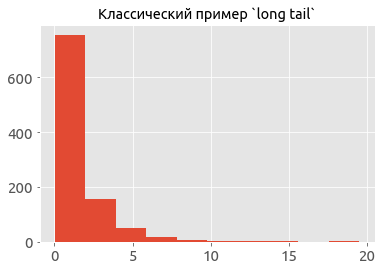

In [24]:
from scipy.stats import lognorm

# сгенерируем себе выборку

data = lognorm(s=1).rvs(1000)
plt.hist(data)
plt.title("Классический пример `long tail`")
plt.show()

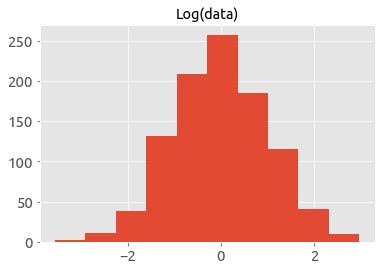

In [25]:
# А вот так выглядят данные после логарифмирования

plt.hist(np.log(data))
plt.title("Log(data)")
plt.show()

---

# Инжинирим признаки

<img src="https://i.imgflip.com/2jvgeb.jpg" width=300 align="center">


Как помочь нашей модели найти полезные зависимости в данных?

Можно условно поделить генерацию признаков на **две части**:
 1. Создание признаков **на основе знаний** и житейского опыта
 2. Создание всяких разных **случайных взаимодействий** признаков
 

### Полиномиальные признаки

Почему готовить новые признаки это хорошо?

**XOR проблема**

XOR – это "исключающее ИЛИ", булева функция со следующей таблицей истинности:

<img src="https://habrastorage.org/storage2/9af/1de/e09/9af1dee09d4d36ff0b15bdb4aae19e3b.png" width=400 align="center">

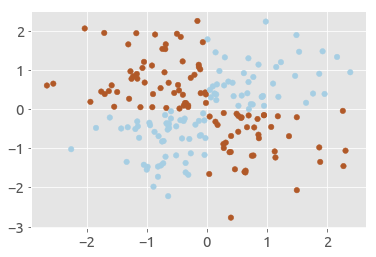

In [26]:
# порождаем данные
rng = np.random.RandomState(0)
X = rng.randn(200, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
plt.show()

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Функция рисует плоскость согласно предсказаниям классификатора clf
def plot_boundary(clf, X, y, plot_title):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                               linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);

In [29]:
from sklearn.linear_model import LogisticRegression

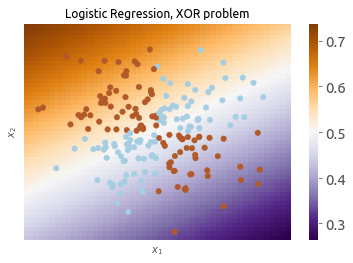

In [30]:
# Применяем логистическую регрессию к нашим данным
# И видим, что линейная модель не способна разделить точки правильно
plot_boundary(LogisticRegression(), X, y, "Logistic Regression, XOR problem")

### Что мы делаем?
Добавляем полиномиальных признаков!

Т.е. получаем несколько признаков из данных путем их возведения в степень и перемножения между собой.

**Пример с двумерными данными, degree=2**

$$\Large (a, b) \rightarrow (1, a, b, a^2, ab, b^2)$$

Удобно, что sklearn уже умеет генерировать полиномиальные признаки для нас

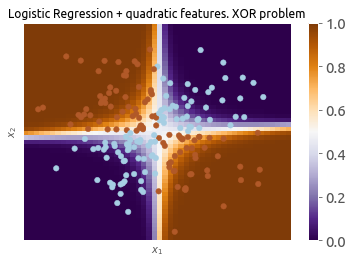

In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

logit_pipe = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                       ('logit', LogisticRegression())])
plot_boundary(logit_pipe, X, y,
        "Logistic Regression + quadratic features. XOR problem")

# Проблема решается!

### Применение житейской смекалки
для создания признаков

<img src="http://memesmix.net/media/created/kudgoj.jpg", width=300>

Есть количество комнат и стоимость аренды

Выделяем новый признак -- стоимость аренды одной комнаты:
```python
rooms = df["bedrooms"]
df["price_per_bedroom"] = df["price"] / rooms
```

# Отбор признаков

1. Чисто статистическими методами
2. С использованием моделей
3. Перебором

### Статистические методы

#### Отсечение низко вариативных признаков
<img src="https://s3.amazonaws.com/ceblog/wp-content/uploads/2016/05/03115329/high-low-variance.png", width=500>

Т.е. если признак очень мало изменяет свое значение среди всех точек выборки, то вероятно, он не очень полезен.

In [32]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification()
x_data_generated.shape

(100, 20)

In [33]:
VarianceThreshold().fit_transform(x_data_generated).shape

(100, 20)

In [34]:
VarianceThreshold(.8).fit_transform(x_data_generated).shape

(100, 16)

In [35]:
VarianceThreshold(.9).fit_transform(x_data_generated).shape

(100, 12)

#### Отбор k лучших с помощью ANOVA
 Мы так и не узнаем сегодня что такое ANOVA, но уже можем это использовать
 
<img src="https://www.questionpro.com/blog/wp-content/uploads/2016/03/rsz_anova-800x444.jpg", width=500>

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif

# Выбираем 5 лучших фичей
x_data_kbest = SelectKBest(f_classif, k=5).fit_transform(x_data_generated, y_data_generated)

# Выбираем фичи по граничному значению дисперсии данных
x_data_varth = VarianceThreshold(.9).fit_transform(x_data_generated)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Результат для исходных данных
cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='accuracy').mean()

0.8284313725490197

In [38]:
# Для отбора по вариативности
cross_val_score(LogisticRegression(), x_data_varth, y_data_generated, scoring='accuracy').mean()

0.8388480392156863

In [39]:
# Для отбора по ANOVA
cross_val_score(LogisticRegression(), x_data_kbest, y_data_generated, scoring='accuracy').mean()

0.8982843137254902

### Использование моделей
Для отбора признаков чаще всего используют L1 регуляризацию с линейной/логистической регрессией или случайный лес (о котором вы пока не знаете)

In [40]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Еще раз покажем результат с простой моделью и исходными данными

lr = LogisticRegression()
print(cross_val_score(lr, x_data_generated, y_data_generated, scoring='accuracy').mean())

0.8284313725490197


In [41]:
# Теперь произведем отбор признаков с помощью нашей логистической регрессии,
# Отобранные признаки подадим далее в саму логистическую регрессию

pipe = make_pipeline(SelectFromModel(estimator=LogisticRegression(penalty='l1',)), LogisticRegression())
print(cross_val_score(pipe, x_data_generated, y_data_generated, scoring='accuracy').mean())

0.8486519607843137


In [42]:
def accuracy(y_true, y_pred):
    return (y_true == y_pred).sum() / y_true

In [43]:
y_1 = np.array([1, 3, 4, 7, 0])
y_2 = np.array([3, 4, 4, 4, 0])
accuracy(y_1, y_2)

array([2.        , 0.66666667, 0.5       , 0.28571429,        inf])

### Перебор признаков

* **Exhaustive Feature Selection** - полный перебор всех возможных сочетаний и подмножеств признаков. Очень долго, но точно найдет нужное.

* **SequentialFeatureSelector** - найдет лучшее подмножество из k признаков.

In [44]:
# устанавливаем mlxtend:
!pip install mlxtend  

You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector

selector = SequentialFeatureSelector(LogisticRegression(), scoring='accuracy',
                                     verbose=2, k_features=3, forward=False, n_jobs=-1)

selector.fit(x_data_generated, y_data_generated)

[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished

[2018-11-10 18:59:36] Features: 19/3 -- score: 0.8800000000000001[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    0.1s finished

[2018-11-10 18:59:36] Features: 18/3 -- score: 0.89[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.1s finished

[2018-11-10 18:59:36] Features: 17/3 -- score: 0.9[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    0.1s finished

[2018-11-10 18:59:37] Features: 16/3 -- score: 0.9099999999999999[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished

[2018-11-10 18:59:37] Features: 15/3 -- score: 0.9099999999999999[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished

[2018-11-10 18:59:37] Features: 14/3 -- score: 0.9099999999999999[Parallel(n_jobs=-1)]: Done   7 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | 

SequentialFeatureSelector(clone_estimator=True, cv=5,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
             floating=False, forward=False, k_features=3, n_jobs=-1,
             pre_dispatch='2*n_jobs', scoring='accuracy', verbose=2)

Итак, удалось достигнуть accuracy=0.99, что супер круто! Но это, конечно, синтетическая задачка. С реальными данными все намного сложнее.

# KaggleInClass

Начнем решать соревнование на платформе `Kaggle` (пока только `InClass`)

Ссылка на соревнование: https://www.kaggle.com/c/best-home

In [46]:
df = pd.read_csv("./train.csv")
print(df.shape)
df.head()

(37014, 14)


,Id,bathrooms,bedrooms,building_id,created,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,TARGET
0,18007,1.0,0,6968b1630406efad96f6a891f0ddf04b,2016-06-27 03:03:09,West 168th Street,['Hardwood Floors'],40.8404,7221431,-73.9376,a9171b0aec2df7c31f96da798343d7ea,['https://photos.renthop.com/2/7221431_37b0f2e...,1425,medium
1,27327,1.0,0,0,2016-05-04 23:11:07,W 73rd St,"['Cats Allowed', 'Dogs Allowed', 'Elevator']",40.7792,6965518,-73.9809,32396a0a600b721a4a7655d4ddcedc4d,['https://photos.renthop.com/2/6965518_719f702...,2375,medium
2,43428,1.0,1,0,2016-04-06 04:43:50,East 10th Street,"['Pre-War', 'Laundry in Unit', 'No Fee']",40.7260,6830882,-73.9784,c3cd45f4381ac371507090e9ffabea80,['https://photos.renthop.com/2/6830882_f583425...,2895,low
3,17018,1.0,1,f49ca2c8ca255a482d7ea03860ae7234,2016-06-02 04:59:09,Broadway,"['Cats Allowed', 'Dogs Allowed', 'Doorman', 'E...",40.7878,7098311,-73.9763,38a0d83da22011cc2f75f6f438a6d4c4,['https://photos.renthop.com/2/7098311_cc9b095...,3150,low
4,13637,1.0,2,cb14c4f807f23ecee1f7469b5159d2de,2016-06-04 02:27:37,Wall Street,"['Doorman', 'Fitness Center', 'Elevator', 'Pub...",40.7047,7107493,-74.0076,6e5c10246156ae5bdcd9b487ca99d96a,['https://photos.renthop.com/2/7107493_05837d3...,5461,low


In [47]:
df[df['TARGET'] == 'high']

,Id,bathrooms,bedrooms,building_id,created,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,TARGET
5,2729,1.0,2,38113ad58a685a6dabc8f89223396606,2016-04-16 03:09:45,East 25th Street,"['Cats Allowed', 'No Fee', 'Doorman', 'Elevato...",40.7369,6882429,-73.9790,8365f1154ced533439de202ebada41e2,['https://photos.renthop.com/2/6882429_0fa2cd1...,3200,high
79,32222,2.0,4,fee4d465932160318364d9d48d272879,2016-05-03 06:21:43,W 16th St.,"['Dogs Allowed', 'Cats Allowed']",40.7416,6959964,-74.0025,42408993aa6e20316ac21161f0280931,['https://photos.renthop.com/2/6959964_478216b...,5600,high
94,2829,2.0,4,205f95d4a78f1f3befda48b89edc9669,2016-04-10 02:59:54,Madison Avenue,"['Fireplace', 'Dining Room', 'Balcony', 'Doorm...",40.7454,6851945,-73.9845,0a6ba20b892ed61df751420934d1ab51,['https://photos.renthop.com/2/6851945_447d086...,6990,high
96,8331,1.0,1,744afce3156a96d49231cb9a61ebed45,2016-04-24 03:08:01,Devoe Street,"['Fireplace', 'Laundry in Building', 'Laundry ...",40.7142,6918689,-73.9381,e9327c69dd63f065a8352a4093f76fc5,['https://photos.renthop.com/2/6918689_adede02...,1984,high
97,24027,1.0,0,8ad1995d3134e7feeade0d5248bed722,2016-06-01 01:39:44,West 56th Street,"['Dishwasher', 'Cats Allowed', 'Dogs Allowed',...",40.7677,7087967,-73.9869,d4da529f5295859bb5c4ef8abbb0a38f,['https://photos.renthop.com/2/7087967_36e5dc2...,1900,high
104,40075,1.0,2,57ef86c28a8ae482dc3a3c3af28e8e48,2016-05-02 02:46:12,10th Ave.,"['Roof Deck', 'Dining Room', 'Doorman', 'Eleva...",40.7593,6952870,-73.9959,e90f2ded843cdb2efd65ef47d9fc8029,['https://photos.renthop.com/2/6952870_3e59822...,3500,high
115,7124,1.0,2,0,2016-04-12 05:20:04,Review Place,"['Dishwasher', 'Hardwood Floors']",40.8852,6860441,-73.8998,63ba8954e3cb79647d71eb0d56025039,['https://photos.renthop.com/2/6860441_8b18014...,1750,high
128,35374,1.0,2,80a120d6bc3aba97f40fee8c2204524b,2016-05-08 02:40:12,Water Street,"['Roof Deck', 'Dining Room', 'Doorman', 'Eleva...",40.7073,6982290,-74.0046,6138560e6a8131cccdaf180dea091087,['https://photos.renthop.com/2/6982290_18a65b7...,2980,high
167,20478,1.0,0,06c6ffd6b52ee4250fce45b90981eb0f,2016-06-12 12:26:25,John Street,['No Fee'],40.7098,7151015,-74.0091,9b19b9e47e668f606a0b1c8c273eeb7c,['https://photos.renthop.com/2/7151015_7176099...,2000,high
174,48397,1.0,1,179f2afd60cfb6fdb88e0221735d0eac,2016-04-04 03:53:46,W 48th St.,"['Dining Room', 'Balcony', 'Doorman', 'Elevato...",40.7609,6821760,-73.9860,c76c699bbebafa044318cc4242de71b8,['https://photos.renthop.com/2/6821760_1d3497a...,3779,high


Тут много всего, но что я делаю:
* беру стоимость на комнату, стоимость на ванную, логарифм цены.
* делаю one-hot по фичам
* делаю one-hot по странам и городам
* добавим еще все даты
* Еще StandartScaler
* PolyFeatures(2)
* (optional) PCA

In [48]:
import ast
import re
import reverse_geocoder as revgc
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

from datetime import datetime, time, date

all_features = {}
all_countries = {}
all_cities = {}
countries = []
cities = []
    
def prepare_X(X, test=-1):
    global all_features
    print(X.shape)
    l1 = np.array(list(X['bathrooms']))
    l1 = [max(x, 1) for x in l1]
    l3 = np.array(list(X['bedrooms']))
    l3 = [max(x, 1) for x in l3]
    l2 = np.array(list(X['price']))
    X['div1'] = l2 / l1
    X['div2'] = l2 / l3
    X['lg'] = np.log(X['price'])

#     я сделал прекалк features, но оставил код    

#     for x in X.features:
#         x = ast.literal_eval(x)
#         for val in x:
#             for value in re.split(r'\*|\.|\&|@|#|/', val):
#                 if value == '' or value == ' ' or sum([c.isalpha() for c in value]) == 0:
#                     continue
#                 if not value.lower() in all_features:
#                     all_features[value.lower()] = 0
#                 all_features[value.lower()] += 1

    if test == -1:
        with open('all_features', 'rb') as f:
            all_features = pickle.load(f)
    
    for x in all_features:
        if all_features[x] <= 1000:
            continue
        X[x] = [1 if ast.literal_eval(val).count(x) else 0 for val in X['features']]
    X["photos_cnt"] = [0 if type(x) == float else len(ast.literal_eval(x)) for x in list(X["photos"])]
    X.drop(axis=1, columns=['photos'], inplace=True)
    
#    это прекалг геоданных    
#
#     global countries
#     global cities
#     countries = []
#     cities = []
#     for x, y in zip(X.latitude, X.longitude):
#         res = revgc.search((xё, y))
#         countries.append(res[0]['cc'])
#         if test == -1:
#             if countries[-1] not in all_countries:
#                 all_countries[countries[-1]] = 0
#             all_countries[countries[-1]] += 1
#         cities.append(res[0]['name'])
#         if test == -1:
#             if cities[-1] not in all_cities:
#                 all_cities[cities[-1]] = 0
#             all_cities[cities[-1]] += 1

    if test == -1:
        with open('train_city', 'rb') as f:
            cities = pickle.load(f)
        with open('train_country', 'rb') as f:
            countries = pickle.load(f)
    all_cities = {}
    all_countries = {}
    for x in cities:
        if not x in all_cities:
            all_cities[x] = 0
        all_cities[x] += 1
    for x in countries:
        if not x in all_countries:
            all_countries[x] = 0
        all_countries[x] += 1
    print(len(all_countries))
    print(len(all_cities))
    for x in all_countries:
        if all_countries[x] <= 1000:
            continue
        X[x] = [1 if val == x else 0 for val in countries]
    for x in all_cities:
        if all_cities[x] <= 1000:
            continue
        X[x] = [1 if val == x else 0 for val in cities]
        
    X['weekday'] = X['created'].apply(lambda x: int(datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date().weekday()))
    X['is_weekend'] = X['created'].apply(lambda x: 1 if datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date().weekday() > 4 else 0)
    for i in range(8):
        X['time_' + str(i)] = X['created'].apply(lambda x: int(datetime.strptime(x, '%Y-%m-%d %H:%M:%S').timetuple()[i]))

    X.drop(axis=1, columns=['created', 'building_id', 'manager_id', 'display_address', 'features', 'latitude', 'listing_id', 'longitude'], inplace=True)
    idx = X.Id
    X.drop(axis=1, columns=['Id'], inplace=True)
    X.fillna(X.mean())
    print(X.shape)
    print(X.columns)
    X = np.array(X)
    X = StandardScaler().fit_transform(X)
    print(X.shape)
    X = VarianceThreshold().fit_transform(X)
    print(X.shape)
    X = PolynomialFeatures(2).fit_transform(X)
    X = StandardScaler().fit_transform(X)
    print(X.shape)
    X = VarianceThreshold().fit_transform(X)
    print(X.shape)
#     PCA я делал для gradientboosting, а то тяжело считается
    X = PCA(n_components = 101).fit_transform(X)
    return X, np.array(idx)

In [49]:
X = df.copy()
y = df.copy().TARGET
st_sz = X.shape[0]
print(st_sz)
test_data = pd.read_csv('./test.csv')
test_data.index = np.arange(X.shape[0] + 1, X.shape[0] + 1 + test_data.shape[0])
X.drop(axis=1, columns=['TARGET'], inplace=True)
X = pd.concat([X, test_data])
X, index = prepare_X(X)

37014
(49352, 13)
2
63
(49352, 52)
Index(['bathrooms', 'bedrooms', 'price', 'div1', 'div2', 'lg',
       'common outdoor space', 'cats allowed', 'dining room', 'hardwood',
       'high speed internet', 'terrace', 'prewar', 'garden', 'doorman',
       'laundry in building', 'elevator', 'wheelchair access', 'roof deck',
       'outdoor space', 'exclusive', 'new construction', 'hardwood floors',
       'laundry in unit', 'no fee', 'balcony', 'patio', 'pre-war',
       'dogs allowed', 'fitness center', 'loft', 'dishwasher', 'swimming pool',
       'photos_cnt', 'US', 'New York City', 'Long Island City', 'Inwood',
       'Weehawken', 'Manhattan', 'Edgewater', 'Brooklyn', 'weekday',
       'is_weekend', 'time_0', 'time_1', 'time_2', 'time_3', 'time_4',
       'time_5', 'time_6', 'time_7'],
      dtype='object')
(49352, 52)
(49352, 40)
(49352, 861)
(49352, 860)


In [50]:
index = index[st_sz:]
X, test = X[:st_sz], X[st_sz:]
if type(y) != numpy.ndarray:
    y.replace('high', 2, inplace=True)
    y.replace('medium', 1, inplace=True)
    y.replace('low', 0, inplace=True)
y = np.array(y)
cnt = X.shape[0]
x_all = []
y_all = []
k = [0, 0, 0]
val = {
    0: 1.4395053085987632,
    1: 4.395439971499822, 
    2: 12.852083333333333
}
def oversampling():
    global cnt, X, x_all, y_all, val, k, y
    for i in range(cnt):
    #     print(i)
        k[y[i]] += val[y[i]]
        while k[y[i]] > 1:
            x_all.append(X[i])
            y_all.append(y[i])
            k[y[i]] -= 1
    X = np.concatenate([X, x_all])
    y = np.concatenate([y, y_all])
oversampling()
X.shape

(148046, 101)

Я делал оверсэмплинг не искусственный, а реальным добавлением в Х, потому что так лучше результат получался.

In [51]:
def save_ans(y_pred, index):
    dct = {0: "low", 2:"high", 1:"medium"}
    ans = pd.DataFrame()
    ans['TARGET'] = [dct[x] for x in y_pred]
    ans['Id'] = [x for x in index]
    # np.arange(test.shape[0])])
    ans.to_csv('ans.csv', index=False)

In [52]:
def calc_score(y, y_pred):
    val = {
        0: 1.4395053085987632,
        1: 4.395439971499822,
        2: 12.852083333333333
    }
    for j in range(3):
        val[j] = len(y) / list(y).count(j)
    ans = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            ans += val[y[i]] / len(y)
    return ans / 3

Это scoring

In [53]:
calc_score(y, y)

1.000000000000112

In [54]:
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = LogisticRegression()
print(X.shape, y.shape)
best_ans = 0
for _ in range(1, X.shape[1] + 1, 20):
#     mask = [1] * X.shape[1]
    mask = SelectKBest(f_classif, _).fit(X, y).get_support()
    # print(mask)
    X_cropped = X[:,mask]
    cur_ans = np.average(cross_val_score(model, X_cropped, y, scoring=make_scorer(calc_score)))
    if cur_ans > best_ans:
        test_cropped = test[:,mask] 
        y_pred = model.fit(X_cropped, y).predict(test_cropped)
        best_ans = cur_ans
        save_ans(y_pred, index)
    print(_, cur_ans)

(148046, 101) (148046,)
1 0.36178941967925055
21 0.3856144108022115
41 0.39461712997450565
61 0.39936995266346376
81 0.4319339777483879
101 0.44332656759288575


Ну и я выбираю K лучших фичей, подгоняя K до хорошего ответа.

Вот свой скор на кеггле я получил в общем-то этим кодом, но без PCA-сжатия, а просто оставлял считаться на пару дней.